In [55]:
from env import get_connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wrangle as w
import seaborn as sns
from math import sqrt
from scipy import stats
import math
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import r2_score


1. Load your zillow dataset.

In [2]:
train, val, test= w.wrangle_zillow()
train.shape, val.shape, test.shape

((1198531, 8), (513657, 8), (428047, 8))

In [3]:
train.drop(columns= ('Unnamed: 0'), inplace= True)

In [4]:
train.head(1)

,year_built,property_value,tax_amount,bedrooms,bathrooms,sqr_feet,fips
1567873,1950.0,191578.0,2712.21,3.0,1.0,1248.0,6037.0


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [5]:
preds= train[['property_value', 'sqr_feet']]

In [6]:
preds['baseline_pre']= round(preds.property_value.mean())
preds.head()

,property_value,sqr_feet,baseline_pre
1567873,191578.0,1248.0,461370
1218138,1345206.0,1326.0,461370
339661,356648.0,1053.0,461370
1017133,175069.0,1256.0,461370
40250,543000.0,1640.0,461370


In [7]:
ols_model= LinearRegression()

ols_model.fit(train[['property_value']], train[['sqr_feet']])

preds['yhat']= ols_model.predict(train[['property_value']])
preds.head()

,property_value,sqr_feet,baseline_pre,yhat
1567873,191578.0,1248.0,461370,1632.724665
1218138,1345206.0,1326.0,461370,2623.183799
339661,356648.0,1053.0,461370,1774.447204
1017133,175069.0,1256.0,461370,1618.550694
40250,543000.0,1640.0,461370,1934.441622


3. Plot the residuals for the linear regression model that you made.

In [8]:
preds['baseline_res']= preds['baseline_pre'] - preds['property_value']
preds.head()

,property_value,sqr_feet,baseline_pre,yhat,baseline_res
1567873,191578.0,1248.0,461370,1632.724665,269792.0
1218138,1345206.0,1326.0,461370,2623.183799,-883836.0
339661,356648.0,1053.0,461370,1774.447204,104722.0
1017133,175069.0,1256.0,461370,1618.550694,286301.0
40250,543000.0,1640.0,461370,1934.441622,-81630.0


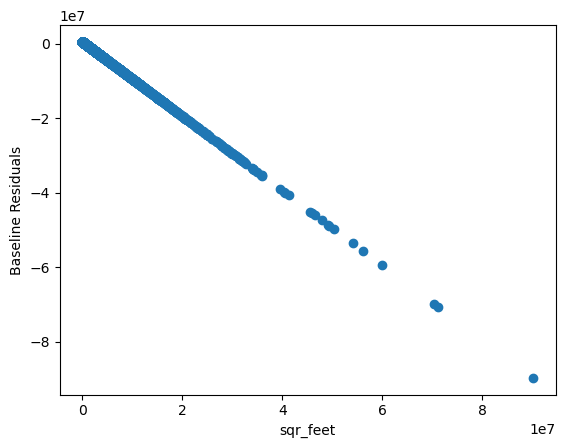

In [9]:
plt.scatter(preds.property_value, preds.baseline_res)
plt.xlabel('sqr_feet')
plt.ylabel('Baseline Residuals')
plt.show()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

- MSE

In [10]:
mse= mean_squared_error(preds.property_value, preds.yhat)
mse

684940054528.7938

- SSE

In [11]:
sse= mse - len(preds)
sse

684938855997.7938

- RMSE

In [12]:
rmse= mse ** .5
rmse

827611.0526864621

- ESS

In [13]:
ess = ((preds.yhat - preds.property_value.mean())**2).sum()
ess

2.530648513763643e+17

- TSS

In [14]:
tss= ess + sse
tss

2.530655363152203e+17

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [16]:
train['baseline'] = train.property_value.mean()

In [37]:
mse_baseline = mean_squared_error(train.property_value, train.baseline)
mse_baseline

474609161778.9538

In [38]:
#create a column for SSE baseline column
train['mse_baseline'] = mse_baseline

In [39]:
sse_baseline = mse_baseline * len(train)
sse_baseline

5.6883379327609126e+17

In [41]:
#create a column for SSE baseline column
train['sse_baseline'] = sse_baseline

In [42]:
rmse_baseline = mse_baseline**.5
rmse_baseline

688918.8354073024

In [43]:
train.head()

,year_built,property_value,tax_amount,bedrooms,bathrooms,sqr_feet,fips,baseline,MSE_baseline,SSE_baseline,mse_baseline,sse_baseline
1567873,1950.0,191578.0,2712.21,3.0,1.0,1248.0,6037.0,461370.07448,4.746092e+11,5.688338e+17,4.746092e+11,5.688338e+17
1218138,1950.0,1345206.0,16539.04,2.0,2.0,1326.0,6037.0,461370.07448,4.746092e+11,5.688338e+17,4.746092e+11,5.688338e+17
339661,1953.0,356648.0,4575.16,2.0,1.0,1053.0,6037.0,461370.07448,4.746092e+11,5.688338e+17,4.746092e+11,5.688338e+17
1017133,1946.0,175069.0,2635.51,3.0,2.0,1256.0,6037.0,461370.07448,4.746092e+11,5.688338e+17,4.746092e+11,5.688338e+17
40250,1957.0,543000.0,6344.96,3.0,2.0,1640.0,6059.0,461370.07448,4.746092e+11,5.688338e+17,4.746092e+11,5.688338e+17


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [24]:
if sse < SSE_baseline:
    print('My OSL model performs better than baseline')
else:
    print('My OSL model performs worse than baseline. :( )')

My OSL model performs better than baseline


7. What is the amount of variance explained in your model?

In [25]:
#First, let's perform this manually
R2 = ess / tss
R2

0.999997293432895

In [26]:
#make it pretty
print('R-squared = ',round(R2,3))
print("Percent of variance = ", round(R2*100,1), "%")

R-squared =  1.0
Percent of variance =  100.0 %


In [34]:
#now, we can use sklearn function for R2 score
r2_score(train.property_value, preds.yhat)

-0.4431665245598446

In [48]:
#explained variance score- using import
evs = explained_variance_score(train.property_value, preds.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.002


8. Is your model better than the baseline model?

In [44]:
rmse_baseline - rmse

-138692.2172791597

In [46]:
if rmse < rmse_baseline:
    print(f'The model rmse performs better the rmse_baseline')
else:
    print(f'The model rmse performs worse than the rmse_baseline')

The model rmse performs worse than the rmse_baseline


9. Create a file named evaluate.py that contains the following functions.

In [ ]:
def plot_residuals(y, yhat):
    '''
    This function takes in actual value and predicted value 
    then creates a scatter plot of those values
    '''
    residuals = y - yhat
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

In [ ]:
plot_residuals(train.home_value, train.yhat)

In [56]:
def regression_errors(y, yhat):
    '''
    This function takes in actual value and predicted value 
    then outputs: the sse, ess, tss, mse, and rmse
    '''
    mse= mean_squared_error(y, yhat)
    ssse= mse * len(y)
    rmse= math.sqrt(mse)
    ess= ((yhat - y.mean())**2).sum()
    tss= ess + sse
           
    print(f'SSE: {sse: .4f}')
    print(f'ESS: {ess: .4f}')
    print(f'TSS: {tss: .4f}')
    print(f'MSE: {mse: .4f}')
    print(f'RMSE: {rmse: .4f}')

    return mse, sse, rmse, ess, tss

In [57]:
regression_errors(train.property_value, preds.yhat)

SSE:  684938855997.7938
ESS:  253064851376364288.0000
TSS:  253065536315220288.0000
MSE:  684940054528.7938
RMSE:  827611.0527


(684940054528.7938,
 684938855997.7938,
 827611.0526864621,
 2.530648513763643e+17,
 2.530655363152203e+17)

In [58]:
def baseline_mean_errors(y):
    baseline = np.repeat(y.mean(), len(y))
    
    mse= mean_squared_error(y, baseline)
    sse= mse * len(y)
    rmse= mse **.5
    
    print(f'sse_baseline: {sse: .4f}')
    print(f'mse_baseline: {mse: .4f}')
    print(f'rmse_baseline: {rmse: .4f}')
    
    return mse, sse, rmse

In [59]:
baseline_mean_errors(train.property_value)

sse_baseline:  568833793276091264.0000
mse_baseline:  474609161778.9538
rmse_baseline:  688918.8354


(474609161778.9538, 5.6883379327609126e+17, 688918.8354073024)

In [ ]:
def better_than_baseline(y, yhat):
   
    sse, , TSS, MSE, RMSE = regression_errors(y, yhat)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    if SSE < SSE_baseline:
        print('My OSL model performs better than baseline')
    else:
        print('My OSL model performs worse than baseline. :( )')
better_than_baseline(train.home_value, train.yhat)